# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Load your dataset
df = pd.read_csv("/content/ticket_dataset.csv")
df.head()

,Year,Transport Cost (Euro),Office Expenses (Euro),Ticket Revenue (Euro),Sponsor Revenue (Euro),Attendance,Goals,Total Salary Expense (Euro),Total Bonus Expense (Euro),Merchandise Revenue (Euro),Advertising Revenue (Euro),Medical Expenses (Euro)
0,2068.118458,5.469189e+06,2.830370e+07,7.397728e+07,1.360585e+08,29843.389558,4339.579697,2.858506e+09,5.414871e+08,4.209306e+08,8.079437e+08,1.367738e+08
1,2043.426091,5.339939e+06,2.682375e+07,7.165495e+07,1.386710e+08,30475.853763,4143.913374,2.744973e+09,6.336499e+08,4.344417e+08,8.905501e+08,1.366757e+08
2,1965.017345,5.959876e+06,2.778722e+07,7.537124e+07,1.434502e+08,29580.917757,4152.204700,3.230757e+09,5.910908e+08,4.221110e+08,9.276828e+08,1.380544e+08
3,2042.105666,4.962446e+06,2.550941e+07,7.007631e+07,1.426457e+08,30280.574628,4178.696513,2.710645e+09,5.169058e+08,3.993745e+08,8.165642e+08,1.447701e+08
4,2056.739809,5.294636e+06,2.938772e+07,6.975022e+07,1.372789e+08,30839.195450,4618.407495,2.985602e+09,5.495372e+08,4.257837e+08,8.729716e+08,1.513644e+08


# EDA

In [3]:
df.columns

Index(['Year', 'Transport Cost (Euro)', 'Office Expenses (Euro)',
       'Ticket Revenue (Euro)', 'Sponsor Revenue (Euro)', 'Attendance',
       'Goals', 'Total Salary Expense (Euro)', 'Total Bonus Expense (Euro)',
       'Merchandise Revenue (Euro)', 'Advertising Revenue (Euro)',
       'Medical Expenses (Euro)'],
      dtype='object')

In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Year                           0
Transport Cost (Euro)          0
Office Expenses (Euro)         0
Ticket Revenue (Euro)          0
Sponsor Revenue (Euro)         0
Attendance                     0
Goals                          0
Total Salary Expense (Euro)    0
Total Bonus Expense (Euro)     0
Merchandise Revenue (Euro)     0
Advertising Revenue (Euro)     0
Medical Expenses (Euro)        0
dtype: int64


In [5]:
print("Shape of the Data:", df.shape)

Shape of the Data: (50000, 12)


In [6]:
print("Data types:\n", df.dtypes)

Data types:
 Year                           float64
Transport Cost (Euro)          float64
Office Expenses (Euro)         float64
Ticket Revenue (Euro)          float64
Sponsor Revenue (Euro)         float64
Attendance                     float64
Goals                          float64
Total Salary Expense (Euro)    float64
Total Bonus Expense (Euro)     float64
Merchandise Revenue (Euro)     float64
Advertising Revenue (Euro)     float64
Medical Expenses (Euro)        float64
dtype: object


In [7]:
print("Summary stats:\n", df.describe())

Summary stats:
                Year  Transport Cost (Euro)  Office Expenses (Euro)  \
count  50000.000000           5.000000e+04            5.000000e+04   
mean    2020.795654           5.720565e+06            2.851602e+07   
std      101.608857           3.405760e+05            1.724641e+06   
min     1533.744020           4.504405e+06            2.221419e+07   
25%     1952.172284           5.483999e+06            2.729940e+07   
50%     2020.913938           5.717716e+06            2.849352e+07   
75%     2089.536349           5.950760e+06            2.970242e+07   
max     2395.211054           7.016661e+06            3.522195e+07   

       Ticket Revenue (Euro)  Sponsor Revenue (Euro)    Attendance  \
count           5.000000e+04            5.000000e+04  50000.000000   
mean            7.138204e+07            1.424139e+08  30053.054986   
std             4.118694e+06            8.273439e+06   1501.721904   
min             5.542448e+07            1.092809e+08  23483.902037   
25%

In [8]:
print("Duplicate rows:\n", df[df.duplicated()])

Duplicate rows:
 Empty DataFrame
Columns: [Year, Transport Cost (Euro), Office Expenses (Euro), Ticket Revenue (Euro), Sponsor Revenue (Euro), Attendance, Goals, Total Salary Expense (Euro), Total Bonus Expense (Euro), Merchandise Revenue (Euro), Advertising Revenue (Euro), Medical Expenses (Euro)]
Index: []


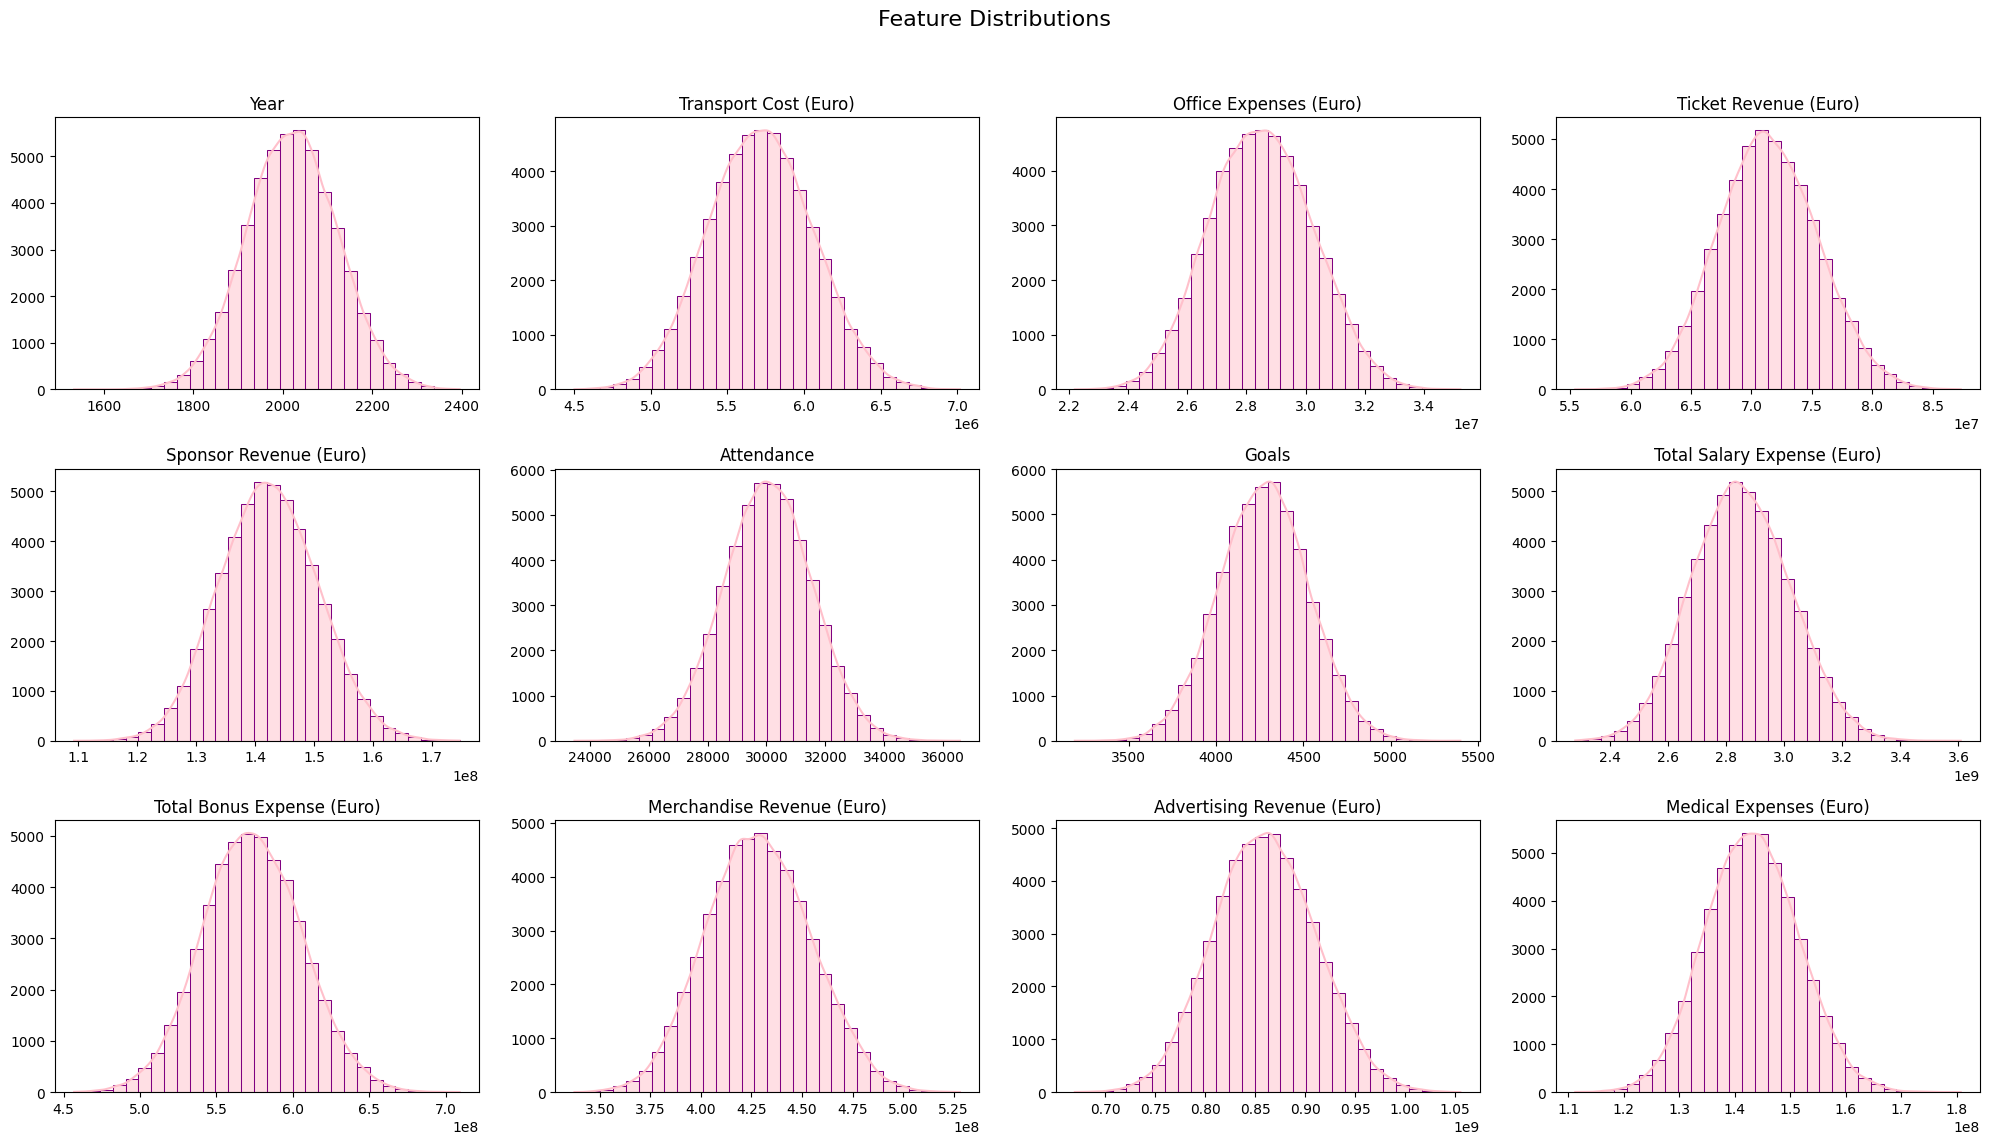

In [9]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Feature Distributions", fontsize=16)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, color='pink', edgecolor='purple', kde=True)
    plt.title(f'{col}')
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

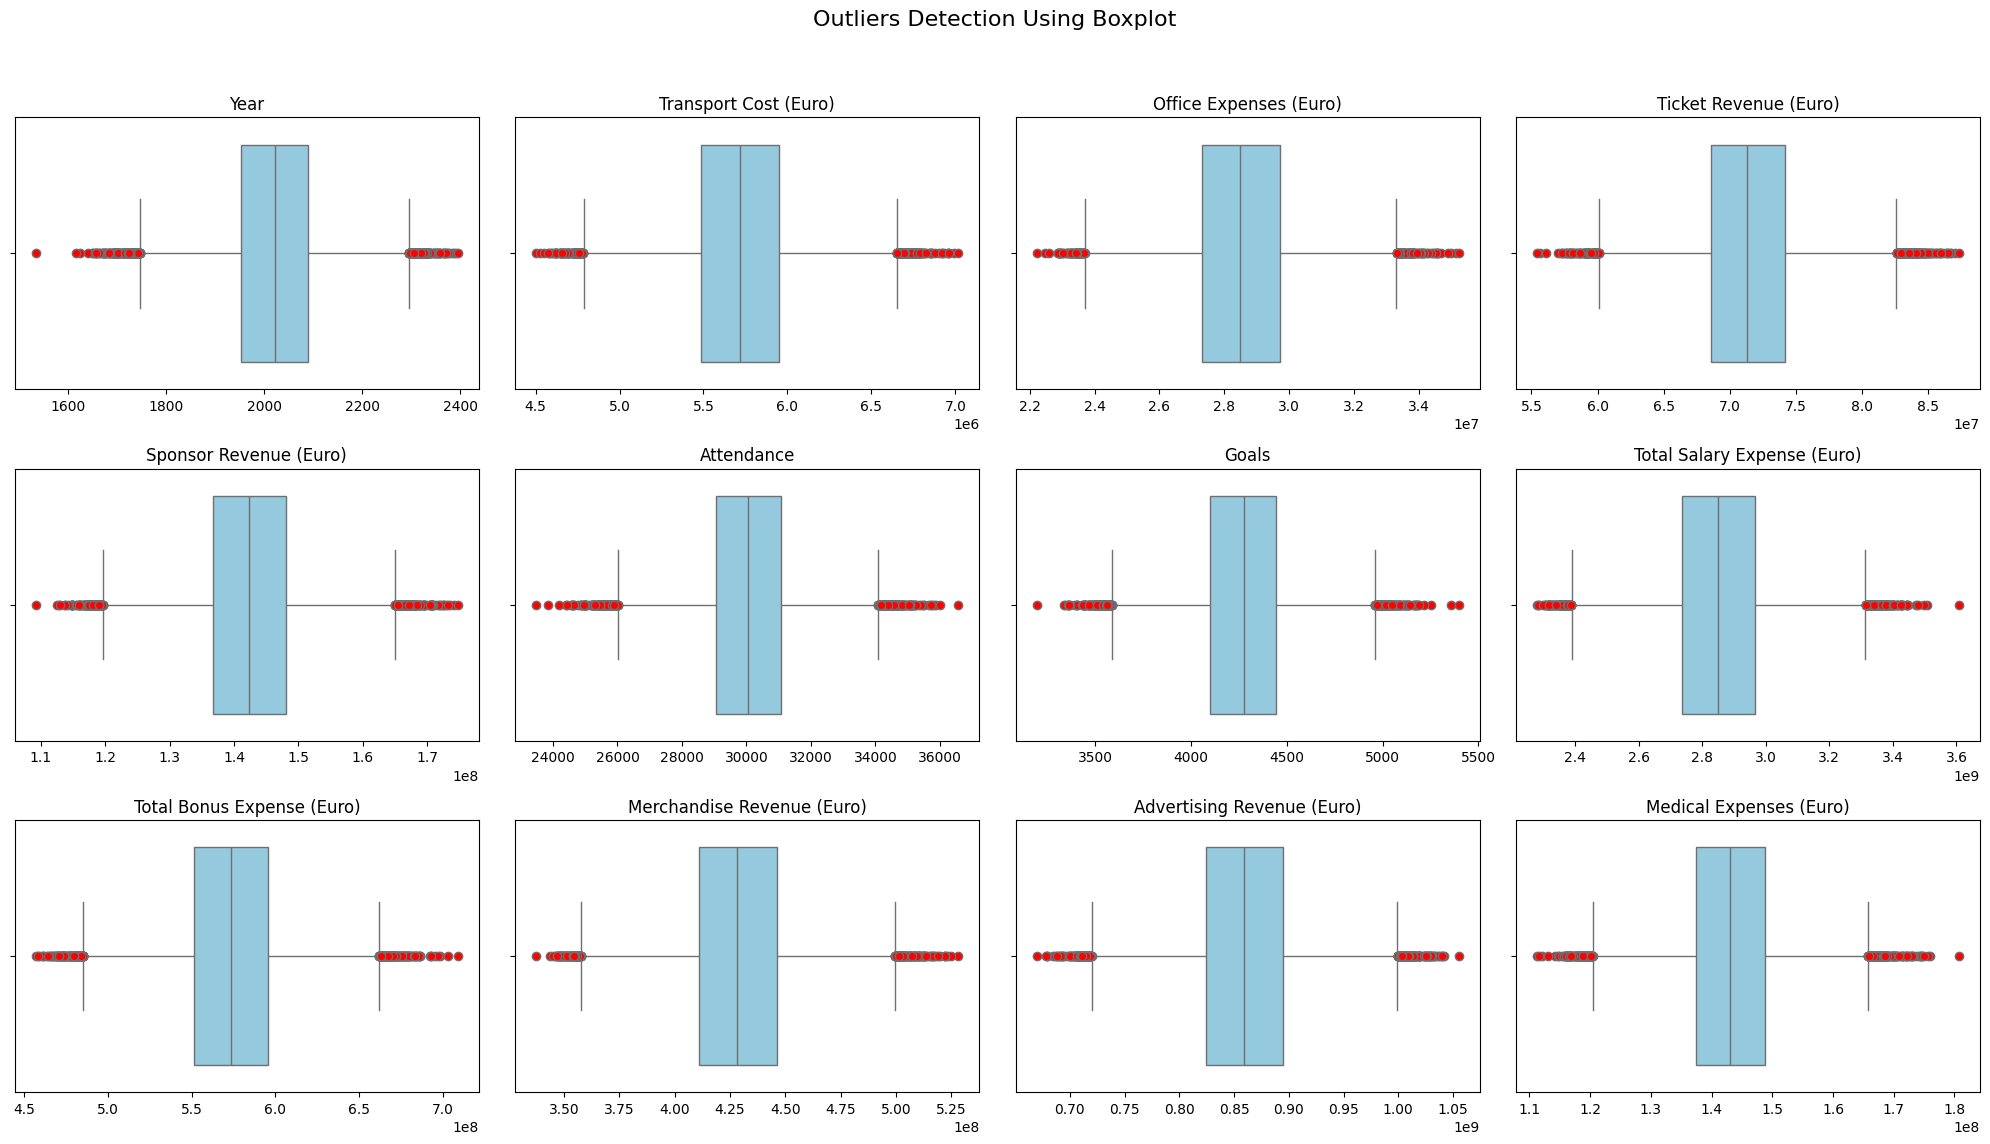

In [10]:
# Plot boxplots to detect outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Outliers Detection Using Boxplot", fontsize=16)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue', flierprops=dict(markerfacecolor='red', marker='o'))
    plt.title(f'{col}')
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

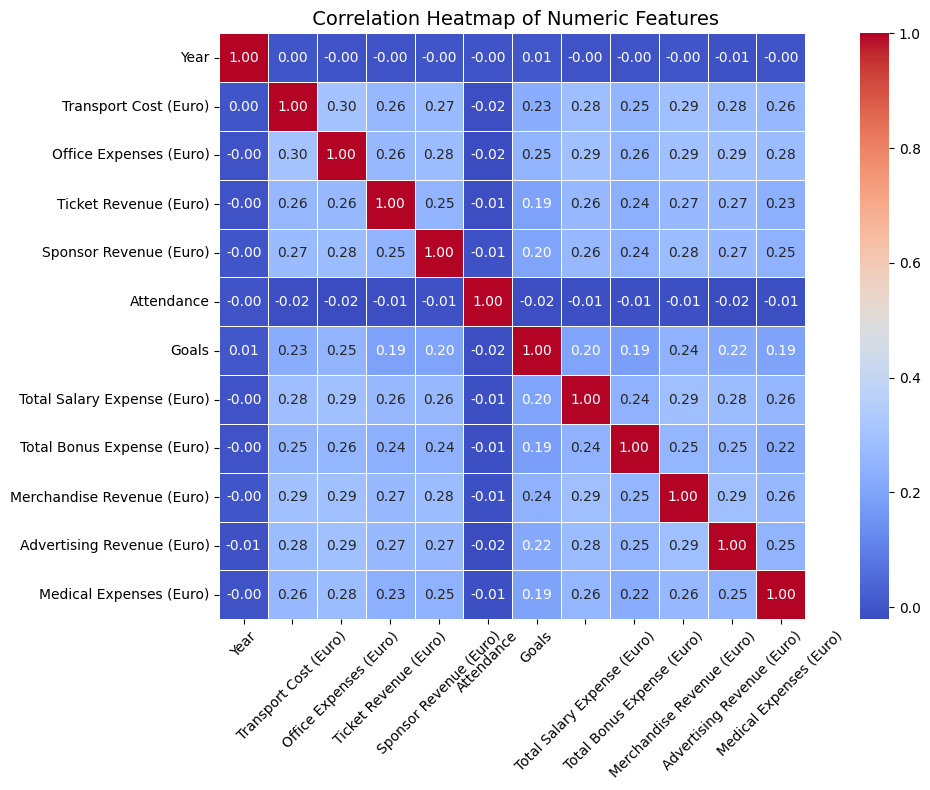

In [11]:
# Plot correlation heatmap
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar=True)

plt.title(" Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# MODEL

In [12]:
# Create the new column: Estimated Ticket Price
df['Estimated_Ticket_Price'] = df['Ticket Revenue (Euro)'] / df['Attendance']

In [13]:
# Standardize selected numeric features
numerical_cols = [
    'Year',
    'Goals',
    'Attendance',
    'Transport Cost (Euro)',
    'Office Expenses (Euro)',
    'Sponsor Revenue (Euro)',
    'Ticket Revenue (Euro)',
    'Merchandise Revenue (Euro)',
    'Advertising Revenue (Euro)',
    'Medical Expenses (Euro)',
    'Total Salary Expense (Euro)',
    'Total Bonus Expense (Euro)',
    'Estimated_Ticket_Price'
]


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
features = ['Attendance', 'Advertising Revenue (Euro)', 'Total Salary Expense (Euro)', 'Merchandise Revenue (Euro)', 'Transport Cost (Euro)']



X = df[features]
y = df['Estimated_Ticket_Price']


In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Build and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 0.49
R-squared Score: 0.50
RMSE: 0.70


# Hyperparameter tuning

In [ ]:
# Define model and parameter grid
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared Score: {r2_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
